<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem Statement</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Acquire-Data" data-toc-modified-id="Acquire-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Acquire Data</a></span></li><li><span><a href="#Prepare" data-toc-modified-id="Prepare-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Prepare</a></span></li><li><span><a href="#Explore" data-toc-modified-id="Explore-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Explore</a></span></li><li><span><a href="#Final-Prep" data-toc-modified-id="Final-Prep-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Final Prep</a></span></li><li><span><a href="#Model" data-toc-modified-id="Model-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Model</a></span></li><li><span><a href="#Evaluate" data-toc-modified-id="Evaluate-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Evaluate</a></span></li><li><span><a href="#Visualize-Results" data-toc-modified-id="Visualize-Results-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Visualize Results</a></span></li></ul></div>

## Problem Statement

You have been hired as a consultant to a start-up that is running targetted marketing ads on facebook. The company wants to anaylze customer behaviour by predicting which customer clicks on the advertisement. Customer data is as follows: 

Data Dictionary: 

RangeIndex: 499 entries, 0 to 498
Data columns (total 6 columns):

|  index  |Column  |      Non-Null Count | Dtype | 
|:-------|:--------------------|:-----|:------|
| 0 |  names      |   499 non-null  |  object |
| 1  | emails      |  499 non-null   | object 
| 2  | country      | 499 non-null   | object |
| 3  | time_on_site | 499 non-null   | float64|
| 4  | income       | 499 non-null  |  float64|
|5  | ad_click     | 499 non-null   | int64  |
 

## Imports

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('figure', figsize=(11, 9))
plt.rc('font', size=13)

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings("ignore")

## Acquire Data

In [2]:
df = pd.read_csv('Facebook_Ads_2.csv', encoding='latin1')
df.columns = ['names', 'emails', 'country', 'time_on_site', 'income', 'ad_click']
df.head()

,names,emails,country,time_on_site,income,ad_click
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradipiscing.co.uk,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   names         499 non-null    object 
 1   emails        499 non-null    object 
 2   country       499 non-null    object 
 3   time_on_site  499 non-null    float64
 4   income        499 non-null    float64
 5   ad_click      499 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 23.5+ KB


In [4]:
# I will make an assumption using Domain Knowledge here that this is measured in minutes bc that info is not provided

df.time_on_site.mean()

32.92017833020841

In [5]:
df.describe()

,time_on_site,income,ad_click
count,499.000000,499.000000,499.000000
mean,32.920178,52896.992469,0.501002
std,9.103455,18989.183150,0.500501
min,5.000000,20.000000,0.000000
25%,26.425044,38888.117260,0.000000
50%,33.196067,52840.913110,1.000000
75%,39.114995,65837.288190,1.000000
max,60.000000,100000.000000,1.000000


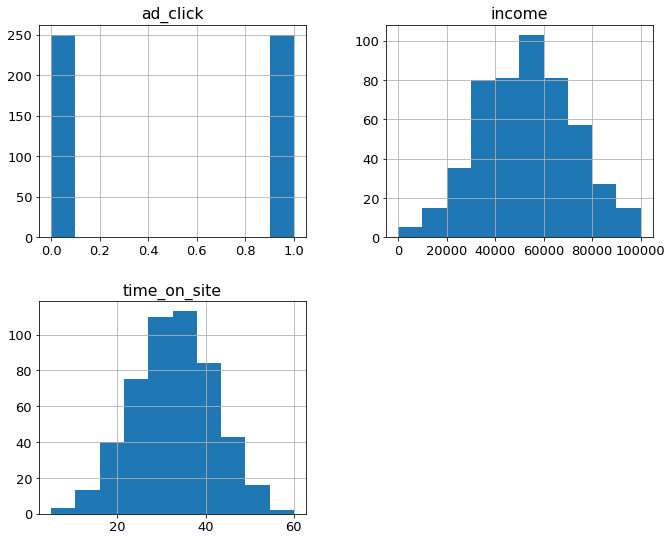

In [6]:
# This is some pretty perfect data...

df.hist()
plt.show()

In [7]:
df.country.value_counts(dropna=False).sum()

499

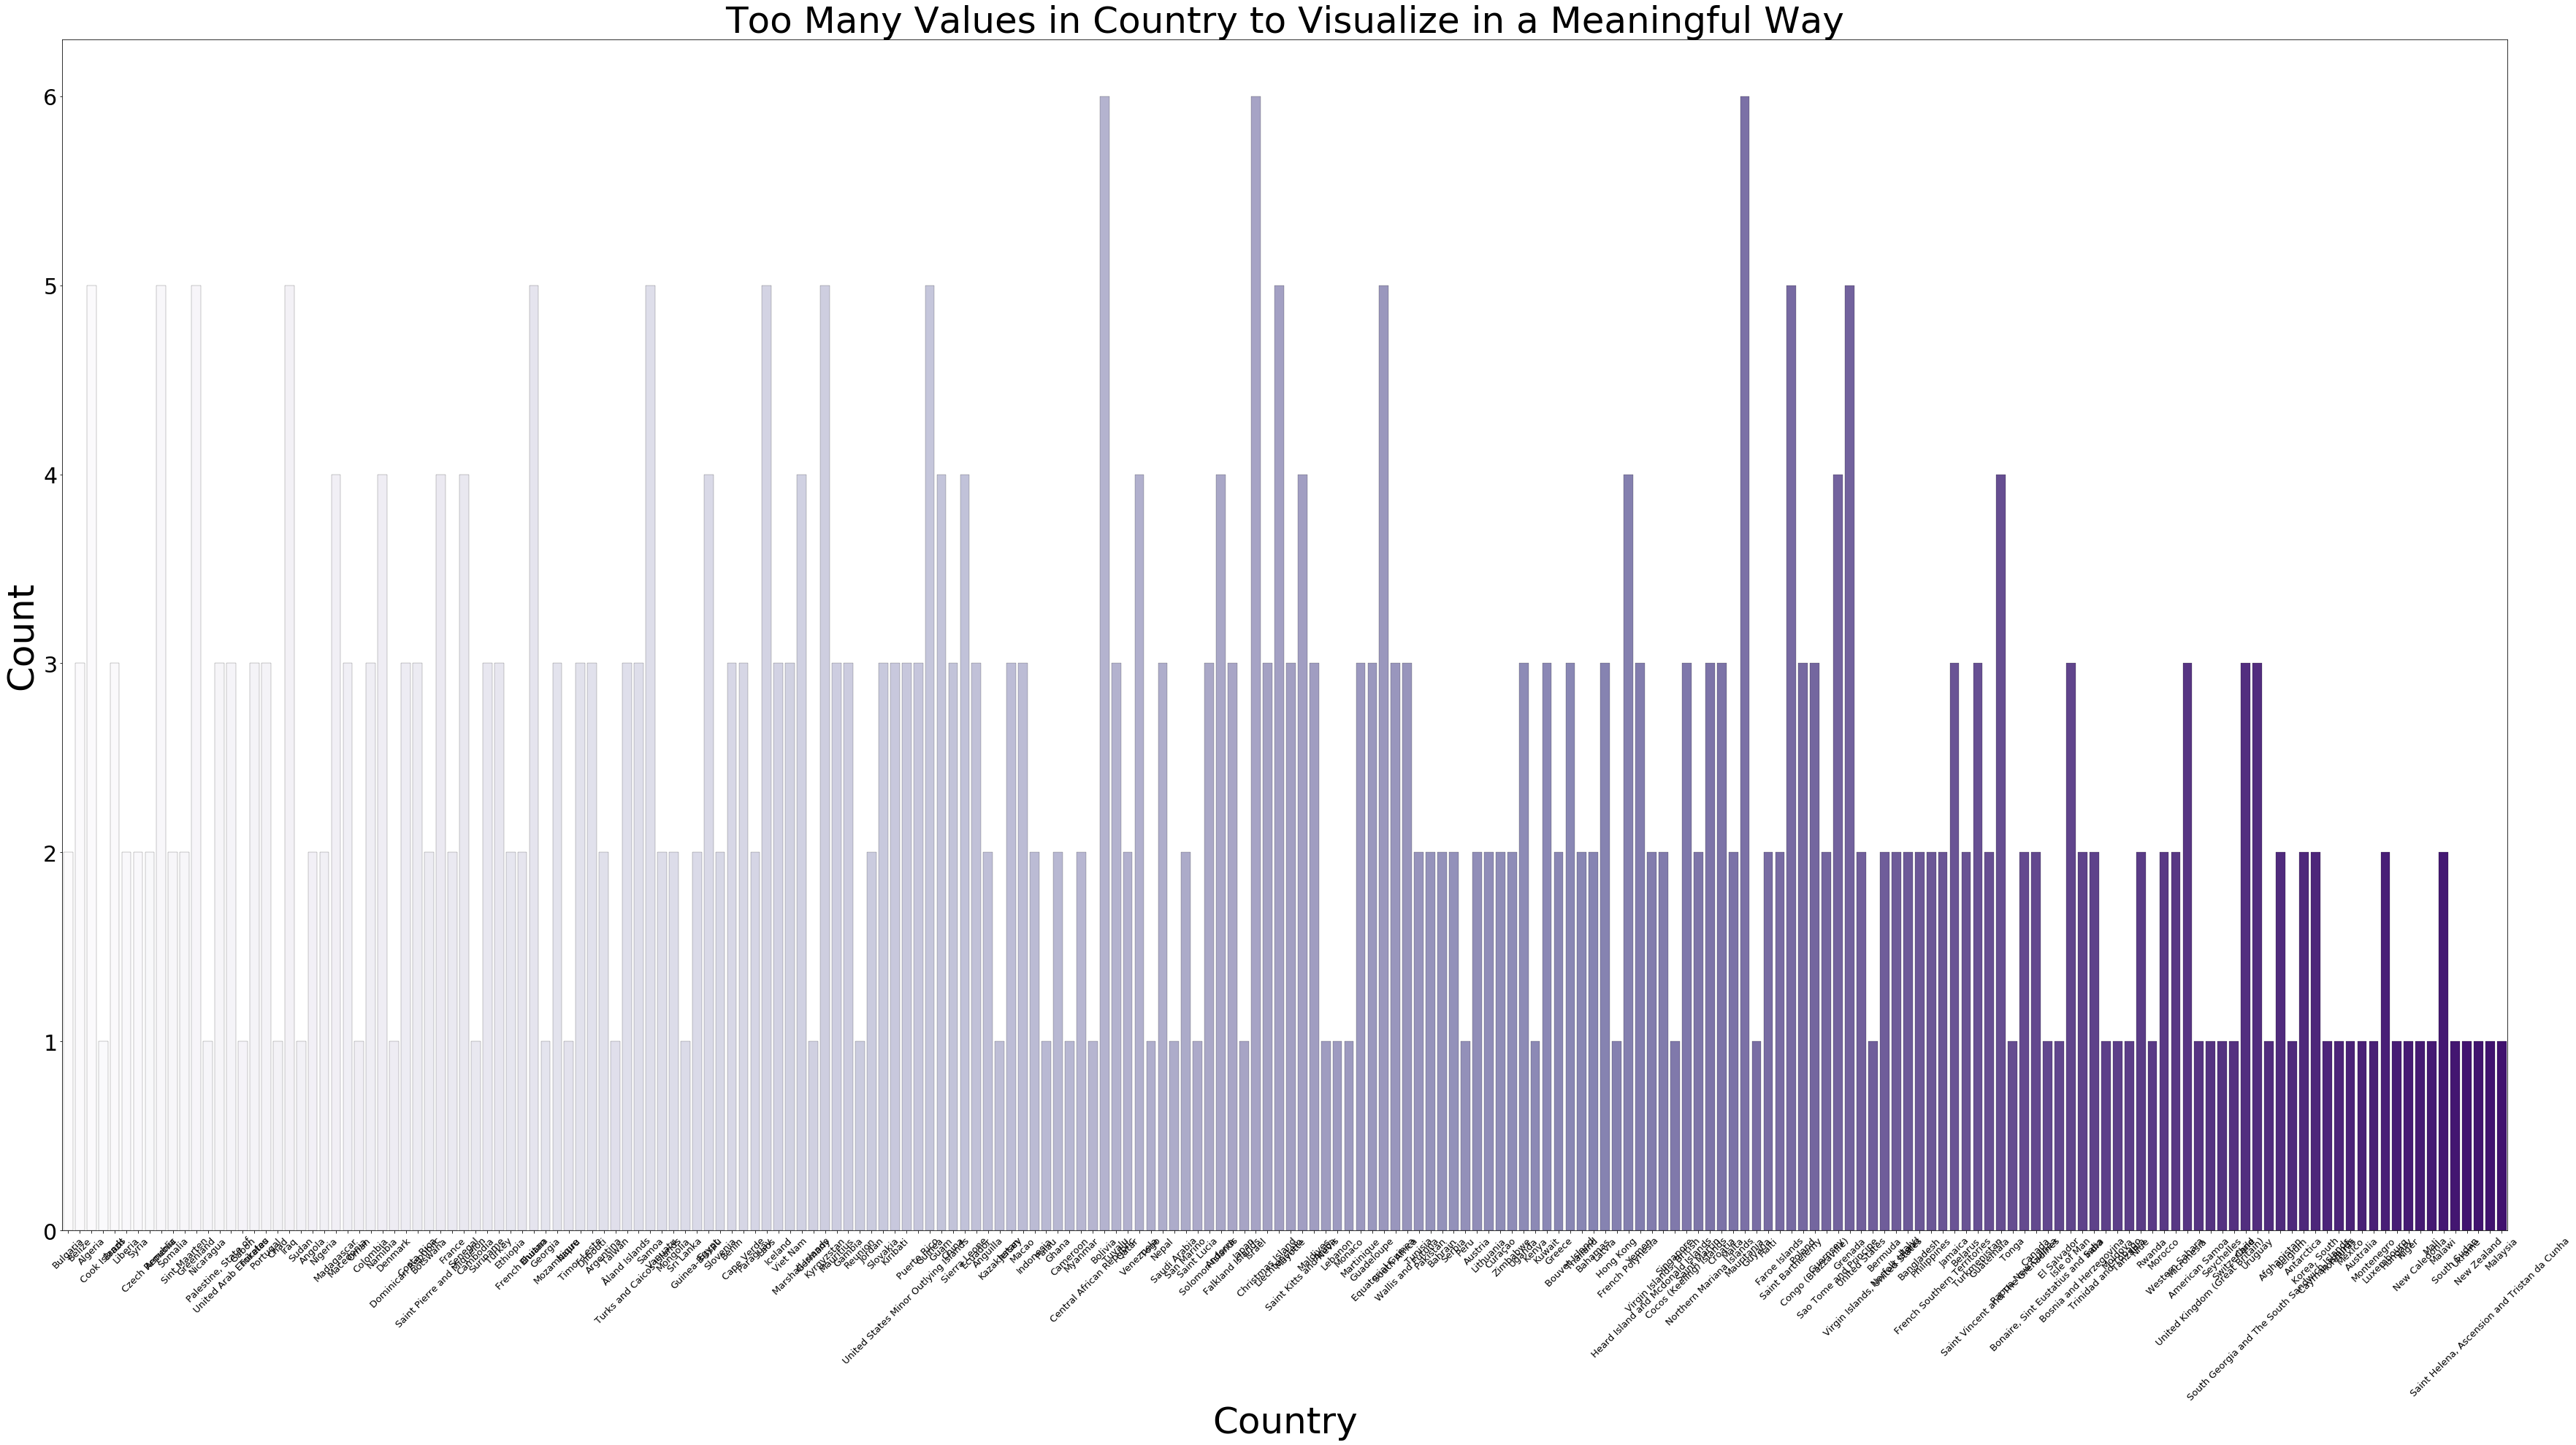

In [8]:
# I can see that most countries have only 1 observation in train and at most 6

plt.figure(figsize=(60,30))

sns.countplot(x='country', data=df, palette='Purples', ec='black', linewidth=.2)

plt.xticks(rotation=45)
plt.yticks(size=30)
plt.title('Too Many Values in Country to Visualize in a Meaningful Way', size=50)

plt.xlabel('Country', size=50)
plt.ylabel('Count', size=50)
plt.show()

## Prepare

- What features will we use to predict?


>The dataset has the numeric values of `income` and `time_on_site`. I might want to encode `country`, so that I can use it as a predictor in my classification model. I will explore the relationships in the dataset to decide about country.

>After light exploration I found that my df has 499 different countries, some with only one observation, so for my first logistic regression model, I'm going to drop country. I can try to encode and use it later to see if it adds value.


- I will create a baseline to beat.


- I will start with a logistic regression model to try to beat my baseline.

In [9]:
# I will drop the emails and names columns, and I will do a train test split before exploring more

df = pd.read_csv('Facebook_Ads_2.csv', encoding='latin1')
df.columns = ['names', 'emails', 'country', 'time_on_site', 'income', 'ad_click']
df = df.drop(columns=['emails', 'names', 'country'])
train, test = train_test_split(df, train_size=.75, random_state=123)

train.head()

,time_on_site,income,ad_click
181,46.525525,86554.95970,1
204,34.945644,39815.21162,0
410,38.618719,58365.20993,1
404,23.973013,25710.85639,0
343,45.663502,77879.46698,1


In [10]:
train.shape

(374, 3)

In [11]:
test.shape

(125, 3)

## Explore 

- Once I have split my data, I will explore before doing more preparation of my data like scaling and encoding. 


- This section will help me decide about final preparation before creating a baseline and modeling to beat my baseline.

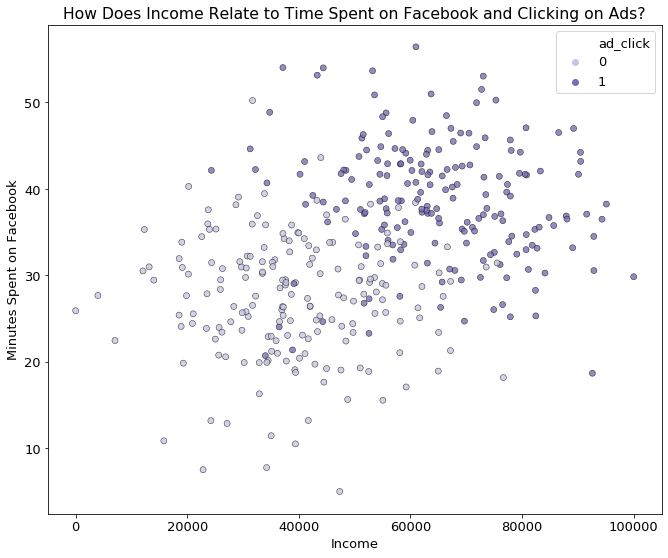

In [32]:
sns.scatterplot(x='income', y='time_on_site', data=train, hue='ad_click', palette='Purples', ec='black', linewidth=.5, alpha=.8)

plt.title('How Does Income Relate to Time Spent on Facebook and Clicking on Ads?')
plt.xlabel('Income')
plt.ylabel('Minutes Spent on Facebook')
plt.legend()
plt.show()

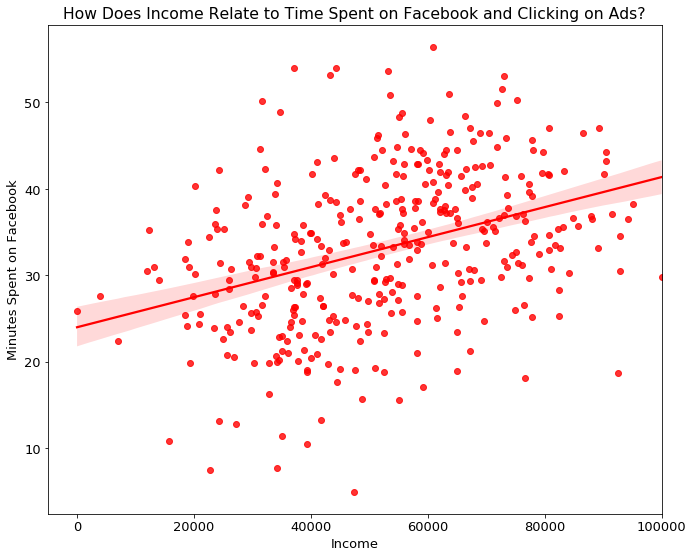

In [41]:
sns.regplot(x='income', y='time_on_site', data=train, color='r')

plt.title('How Does Income Relate to Time Spent on Facebook and Clicking on Ads?')
plt.xlabel('Income')
plt.ylabel('Minutes Spent on Facebook')

plt.show()

In [51]:
# This is not a really strong correlation, so these variables should both be able to serve as features in my model

from scipy import stats

r, p = stats.pearsonr(train['income'], train['time_on_site'])

print(f'income and time_on_site have a pearson r score of {r:.2%} and a p-value of {p:.3}.')

income and time_on_site have a pearson r score of 37.32% and a p-value of 8.33e-14.


## Final Prep

In [52]:
# Feature Scaling

scaler = MinMaxScaler()
train[['income', 'time_on_site']] = scaler.fit_transform(train[['income', 'time_on_site']])
test[['income', 'time_on_site']] = scaler.transform(test[['income', 'time_on_site']])
train.head()

,time_on_site,income,ad_click
181,0.807345,0.865523,1
204,0.582207,0.398032,0
410,0.653620,0.583569,1
404,0.368876,0.256960,0
343,0.790585,0.778750,1


In [53]:
test.head(1)

,time_on_site,income,ad_click
85,0.49725,0.65736,1


## Model

In [ ]:
# Fitting Logistic Regression to the Training set


## Evaluate

## Visualize Results

In [ ]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))

plt.xlim(X1.min(), X1.max())

plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('lightgrey', 'dodgerblue'))(i), label = j)

plt.title('Facebook Ad: Customer Click Prediction (Training set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()

plt.show()

In [ ]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))

plt.xlim(X1.min(), X1.max())

plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)

plt.title('Facebook Ad: Customer Click Prediction (Testing set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()

plt.show()

# EXCELLENT JOB! NOW YOU'VE BECOME EXPERT IN LOGISTIC REGRESSION